<a href="https://colab.research.google.com/github/mkbahk/DeepLearningwithKeras/blob/master/2_1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EA%B3%BC%EC%9D%98_%EC%B2%AB%EB%A7%8C%EB%82%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
print(train_images.ndim)

3


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
print(train_images.dtype)

uint8


In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [6]:
digit = train_images[4]
import matplotlib.pyplot as plt

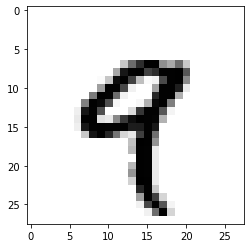

In [7]:
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

넘파이로 텐서 조작하기


In [8]:
my_slice =  train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [9]:
my_slice =  train_images[10:100, : , :]
print(my_slice.shape)

(90, 28, 28)


In [10]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [11]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [12]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

In [13]:
batch = train_images[:128]
batch.shape

(128, 28, 28)

In [14]:
batch = train_images[128:256]
batch.shape

(128, 28, 28)

In [18]:
n = 60
batch = train_images[128 * n:128 *(n + 1)]
batch.shape

(128, 28, 28)

In [ ]:
from keras import models
from keras import layers

In [ ]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [ ]:
network.fit(x=train_images, y=train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2523 - accuracy: 0.9262
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1018 - accuracy: 0.9701
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0681 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0496 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0375 - accuracy: 0.9884


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0650 - accuracy: 0.9809
test_acc: 0.98089998960495
